# Getting Started

In [1]:
%load_ext autoreload
%autoreload 2

# Example 01

## Run simulation

Reading mesh_ex01.1.node
Reading mesh_ex01.1.ele
Reading mesh_ex01.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  0.4885258674621582 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.06862735748291016 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  3.5597262382507324 sec

Assembling the system of equations for line segments
Time elapsed  0.5724391937255859 sec

Incoorprating the boundary condition of the third kind
Time elapsed  0.48806190490722656 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  0.07282066345214844 sec

Calling sparse linear system solver
Time elapsed  0.06574296951293945 sec

Computing fields and gradients in elements
Time elapsed  0.0035483837127685547 sec



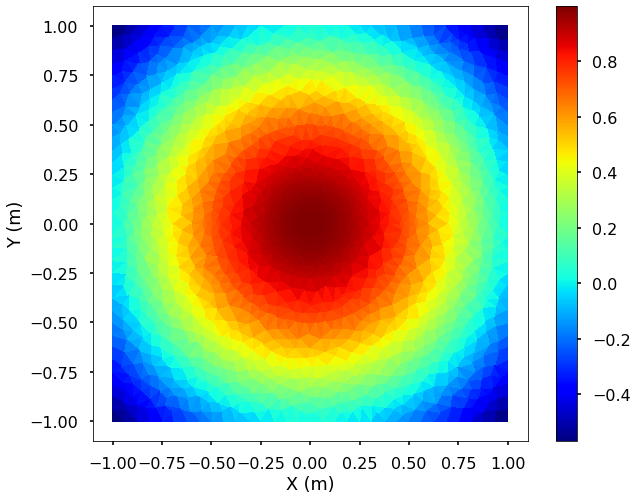

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh
from lib.materials import PDE
from lib.assembly import FEM

#predefine source function
def build_f(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    f = np.zeros_like(dist)
    mask = dist>0
    f[mask] = np.pi/2.0*(1/dist[mask]*np.sin(np.pi*dist[mask]/2.0)
                         +np.pi/2.0*np.cos(np.pi*dist[mask]/2.0))
    f[~mask] = np.pi/2.0*(np.pi/2.0+np.pi/2.0)
    return f

#predefined boundary condition
def build_s(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    s = np.cos(np.pi*dist/2.0)
    return s

#import mesh
mesh = Mesh.importer(
    prefix = 'mesh_ex01',
    axis_symmetry = 'None',
    unscale_factor = 1e-6,
    )

#define PDE
pde = PDE(
    c_x = {'is_inside_domain':[[1.0]]},
    c_y = {'is_inside_domain':[[1.0]]},
    f_n = {'is_on_inside_domain':[build_f]},
    s_n = {'is_on_outer_bound':[build_s]},
    )

#build FEM system
fem = FEM(mesh,pde)

#display results
mesh.tripcolor(fem.sol)

## Validate solution

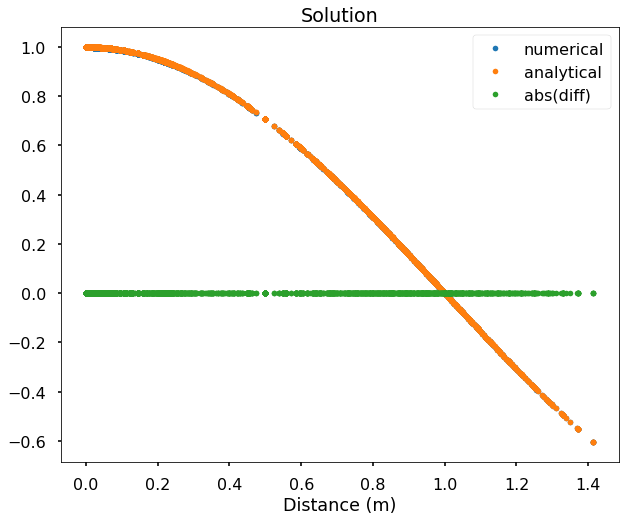

In [3]:
def display_line_real_imag():
    sol = fem.sol
    nodes = fem.mesh.nodes   
    dist = np.sqrt(nodes[:,0]**2+nodes[:,1]**2)
    ansol = np.cos(np.pi*dist/2.0)
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.plot(dist,sol,'.',color='tab:blue')
    ax.plot(dist,ansol,'.',color='tab:orange')
    ax.plot(dist,np.abs(sol-ansol),'.',color='tab:green')

    ax.set_xlabel('Distance (m)')
    ax.set_title('Solution')
    ax.legend(['numerical','analytical','abs(diff)'])
    
    plt.savefig('ex_01.png',bbox_inches='tight')
    plt.show()
    return

if __name__=='__main__':
    display_line_real_imag()

# Example 02

## Run simulation

Reading mesh_ex01.1.node
Reading mesh_ex01.1.ele
Reading mesh_ex01.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  0.48660731315612793 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.06750059127807617 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  3.6188180446624756 sec

Assembling the system of equations for line segments
Time elapsed  0.5726442337036133 sec

Incoorprating the boundary condition of the third kind
Time elapsed  0.4927327632904053 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  0.0711660385131836 sec

Calling sparse linear system solver
Time elapsed  0.0657811164855957 sec

Computing fields and gradients in elements
Time elapsed  0.003602743148803711 sec



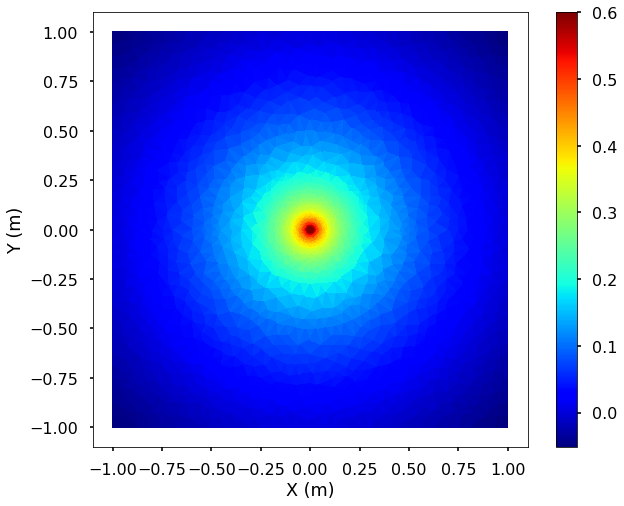

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

from lib.mesh import Mesh
from lib.materials import PDE
from lib.assembly import FEM

#predefine source function
def build_f(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    f = np.zeros_like(dist)
    f[dist==0] = 1.0
    return f

#predefined boundary condition
def build_s(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    s = -np.log(dist)/2/np.pi
    return s

#import mesh
mesh = Mesh.importer(
    prefix = 'mesh_ex01',
    axis_symmetry = 'None',
    unscale_factor = 1e-6
    )

#define PDE
pde = PDE(
    c_x = {'is_inside_domain':[[1.0]]},
    c_y = {'is_inside_domain':[[1.0]]},
    f_d = {'is_on_inside_domain':[build_f]},
    s_n = {'is_on_outer_bound':[build_s]},
    )

#build FEM system
fem = FEM(mesh,pde)

#display results
mesh.tripcolor(fem.sol,vmax=0.6)

## Validate solution

Computing fields and gradients in elements
Time elapsed  0.0026984214782714844 sec



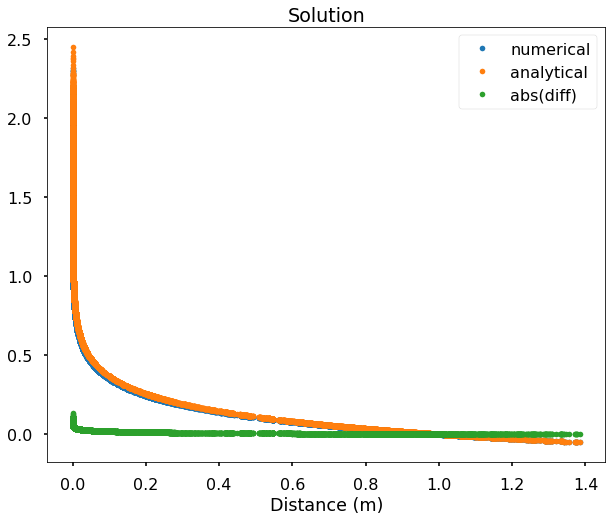

In [5]:
def display_line_real_imag():
    sol = fem.mesh.grad2d(fem.sol)[:,0]
    elem_mids = fem.mesh.elem_mids
    dist = np.sqrt(elem_mids[:,0]**2+elem_mids[:,1]**2)
    ansol = -np.log(dist)/2/np.pi
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.plot(dist,sol,'.',color='tab:blue')
    ax.plot(dist,ansol,'.',color='tab:orange')
    ax.plot(dist,np.abs(sol-ansol),'.',color='tab:green')

    ax.set_xlabel('Distance (m)')
    ax.set_title('Solution')
    ax.legend(['numerical','analytical','abs(diff)'])
    
    plt.savefig('ex_02.png',bbox_inches='tight')
    plt.show()
    return

if __name__=='__main__':
    display_line_real_imag()

# Example 03

## Run simulation

Reading mesh_ex03.1.node
Reading mesh_ex03.1.ele
Reading mesh_ex03.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  0.7175381183624268 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.22919631004333496 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  3.7650697231292725 sec

Assembling the system of equations for line segments
Time elapsed  1.0581514835357666 sec

Incoorprating the boundary condition of the third kind
Time elapsed  0.922518253326416 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  0.7565498352050781 sec

Calling sparse linear system solver
Time elapsed  0.08658242225646973 sec

Computing fields and gradients in elements
Time elapsed  0.0033922195434570312 sec



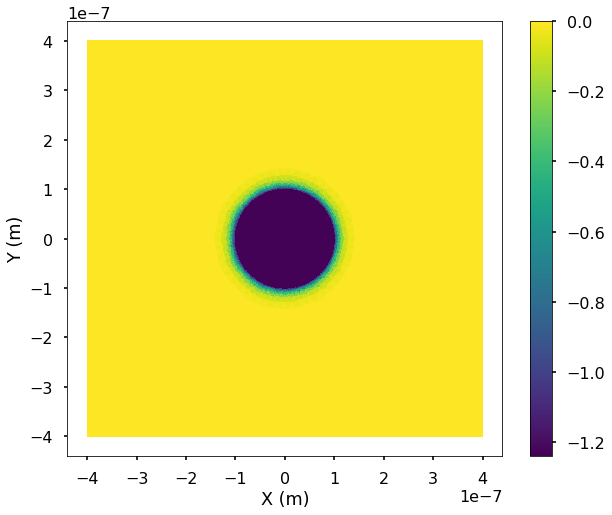

In [113]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh
from lib.materials import StaticPDE,Physics
from lib.assembly import StaticFEM

#import mesh
mesh = Mesh.importer(
    prefix = 'mesh_ex03',
    axis_symmetry = 'X',
    unscale_factor=1e-6,
    )

#define physical parameters
physics = Physics(
    c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
    z_ion = [-1.0,1.0], #ion valence or charge number [SI]
    mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
    mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
    rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
    rel_perm_i = 4.5, #relative permittivity of solid [SI]
    sigma_solid = -0.01, #surface charge density for solid [C]
    temperature = 293.0, #ambient temperature [K]
    e_0 = [0.0,0.0], #Ex/Ey at infinity
    f_0 = [[0.0,0.0,0.0]], #x/y/charge density at point sources
    s_0 = 0.0, #voltage on equipotential surface
    radius_a = 0.1e-6, #radius of sphere particle
    is_solid_metal = False, #True if solid is metal otherwise false
    )

#build PDE using pre-defined physics
pde = StaticPDE(physics)

#build FEM system
fem = StaticFEM(mesh,pde)

#display results
mesh.tripcolor(fem.sol[:,-2],cmap='viridis')


## Validate solution

Computing 1D linear PB solution in spherical coordinates
SOLID PARTICLE RADIUS IS: 1e-07
RELATIVE PERMITTIVITY OF ELECTROLYTE IS: 80.0
TEMPERATURE IS: 293.0
ION COCENTRATION AT INFINITY IS: 1.0
ION VALENCE IS: 1.0
THERMAL ENERGY IS: 0.025248786458085374
SURFACE CHARGE DENSITY AT SPHERE IS: -0.1
DEBYE LENGTH IS: 9.627066398783066 nm



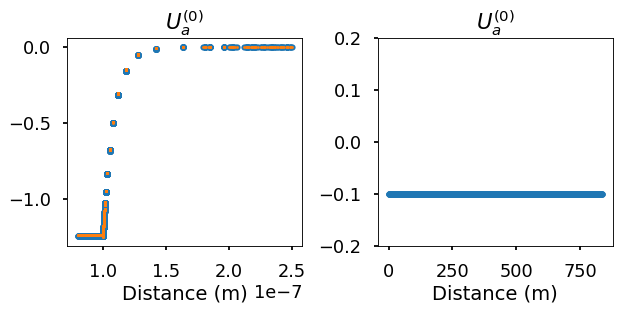

In [114]:
def ansol_sphere(x,y,z,radius_a,rel_perm_a,temperature,c_ion,z_ion,zeta,grad_flag):
    print('Computing 1D linear PB solution in spherical coordinates')
    perm_a = EPSILON_0*rel_perm_a
    q_ion = z_ion*E_C
    lambda_d = np.sqrt(perm_a*K_B*temperature/2/q_ion**2/N_A/c_ion)
    
    print('SOLID PARTICLE RADIUS IS:',radius_a)
    print('RELATIVE PERMITTIVITY OF ELECTROLYTE IS:',rel_perm_a)
    print('TEMPERATURE IS:',temperature)
    print('ION COCENTRATION AT INFINITY IS:',c_ion)
    print('ION VALENCE IS:',z_ion)
    print('THERMAL ENERGY IS:',K_B*temperature/q_ion)
    
    if grad_flag:
        print('SURFACE CHARGE DENSITY AT SPHERE IS:',zeta)
    else:
        print('POTENTIAL AT SPHERE IS:',zeta)
    
    print('DEBYE LENGTH IS:',lambda_d*1e9,'nm')
    print('')

    if grad_flag:
        zeta = zeta/(1/lambda_d+1/radius_a)/perm_a

    dist = np.sqrt(x**2+y**2+z**2)
    phi = np.zeros((len(dist),4),dtype=float)
    mask = dist>= radius_a
    phi[mask,0] = zeta*radius_a*np.exp((radius_a-dist[mask])/lambda_d)/dist[mask]
    phi[~mask,0] = zeta
    phi[mask,1] = -phi[mask,0]*(1/lambda_d+1/dist[mask])*x[mask]/dist[mask]
    phi[mask,2] = -phi[mask,0]*(1/lambda_d+1/dist[mask])*y[mask]/dist[mask]
    phi[mask,3] = -phi[mask,0]*(1/lambda_d+1/dist[mask])*z[mask]/dist[mask]
    
    return phi

if __name__ == '__main__':
    dist_factor = 1.0
    n_node = len(mesh.nodes)
    nodes = mesh.nodes
    u_n = np.reshape(fem.sol,(n_node,-1))
    radius_a = 0.1e-6
    EPSILON_0 = physics.p
    E_C = physics.e
    K_B = physics.k
    N_A = physics.a
    
    fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=80)
    axes = ax.flatten()
#     x = np.linspace(0,10e-9,100)
#     y = np.zeros_like(x)
#     z = np.zeros_like(x)
#     ansol = ansol_sphere(x=x,y=y,z=z,
#         radius_a=5e-9,rel_perm_a=78.5,temperature=298.0,
#         c_ion=100.0,z_ion=1.0,zeta=0.01,grad_flag=True)
#     axes[0].plot(x,ansol[:,0],'.')
#     print(ansol[0,0])

    x = nodes[:,0]/dist_factor
    y = nodes[:,1]/dist_factor
    z = np.zeros(n_node,dtype=float)
    ansol = ansol_sphere(x=x,y=y,z=z,
        radius_a=radius_a,rel_perm_a=80.0,temperature=293.0,
        c_ion=1.0,z_ion=1.0,zeta=-0.1,grad_flag=True)
    dist = np.sqrt(nodes[:,0]**2+nodes[:,1]**2)/dist_factor
    mask = (dist>=1.0*radius_a)&(dist<=1.015*radius_a)
    mask = (dist>=0.8*radius_a)&(dist<=2.5*radius_a)
    axes[0].plot(dist[mask],ansol[mask,0],'.')
    axes[0].plot(dist[mask],u_n[mask,-2],'.',markersize=5)
    
    edges = mesh.edges
    mask = mesh.is_with_stern
    ind_n = np.unique(edges[mask,:].flatten(order='C'))
    axes[1].plot(u_n[ind_n,-1],'.')
    axes[1].set_ylim([-0.2,0.2])
    
    axes[0].set_xlabel('Distance (m)')
    axes[1].set_xlabel('Distance (m)')
    axes[0].set_title('$U^{(0)}_a$')
    axes[1].set_title('$U^{(0)}_a$')
    
    plt.tight_layout()
    plt.show()


# Example 04

## Run simulation

Reading mesh_ex03.1.node
Reading mesh_ex03.1.ele
Reading mesh_ex03.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  0.7149887084960938 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.22768473625183105 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  17.906187295913696 sec

Assembling the system of equations for line segments
Time elapsed  1.1240990161895752 sec

Incoorprating the boundary condition of the third kind
Time elapsed  0.9424111843109131 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  0.6052978038787842 sec

Calling sparse linear system solver
Time elapsed  0.524864912033081 sec

Computing fields and gradients in elements
Time elapsed  0.003966569900512695 sec



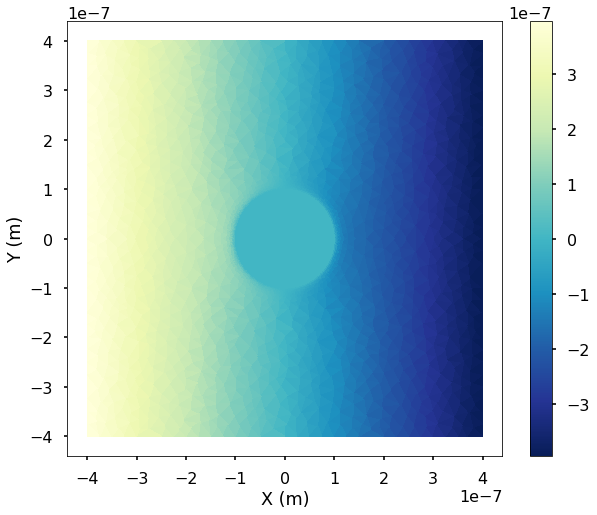

Computing fields and gradients in elements
Time elapsed  0.0037696361541748047 sec



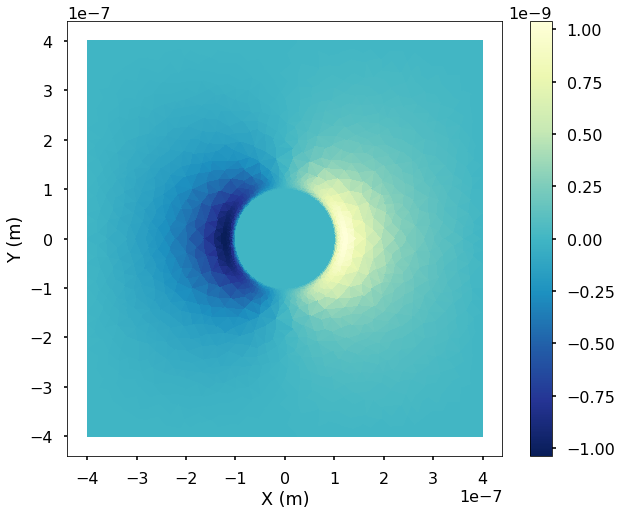

In [47]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh
from lib.materials import PerturbPDE,Physics
from lib.assembly import PerturbFEM

#import mesh
mesh = Mesh.importer(
    prefix = 'mesh_ex03',
    axis_symmetry = 'X',
    unscale_factor=1e-6,
    )

#define physical parameters
physics = Physics(
    c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
    z_ion = [-1.0,1.0], #ion valence or charge number [SI]
    mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
    mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
    rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
    rel_perm_i = 4.5, #relative permittivity of solid [SI]
    sigma_solid = -0.01, #surface charge density for solid [C]
    temperature = 293.0, #ambient temperature [K]
    e_0 = [1.0,0.0], #Ex/Ey at infinity
    f_0 = [[0.0,0.0,0.0]], #x/y/charge density at point sources
    s_0 = 0.0, #voltage on equipotential surface
    radius_a = 0.1e-6, #radius of sphere particle
    is_solid_metal = True, #True if solid is metal otherwise false
    )

#build PDE using pre-defined physics
pde = PerturbPDE(physics)

#build FEM system
fem = PerturbFEM(mesh,pde)

#display results
mesh.tripcolor(np.real(fem.sol[:,-2]),cmap='YlGnBu_r')
mesh.tripcolor(np.imag(fem.sol[:,-2]),cmap='YlGnBu_r')


Computing fields and gradients in elements
Time elapsed  0.0031800270080566406 sec

Computing fields and gradients in elements
Time elapsed  0.0031387805938720703 sec

Computing fields and gradients in elements
Time elapsed  0.0030775070190429688 sec

Computing fields and gradients in elements
Time elapsed  0.003118753433227539 sec

Computing fields and gradients in elements
Time elapsed  0.003070354461669922 sec

Computing fields and gradients in elements
Time elapsed  0.003129720687866211 sec

Computing fields and gradients in elements
Time elapsed  0.003078460693359375 sec

Computing fields and gradients in elements
Time elapsed  0.0030045509338378906 sec



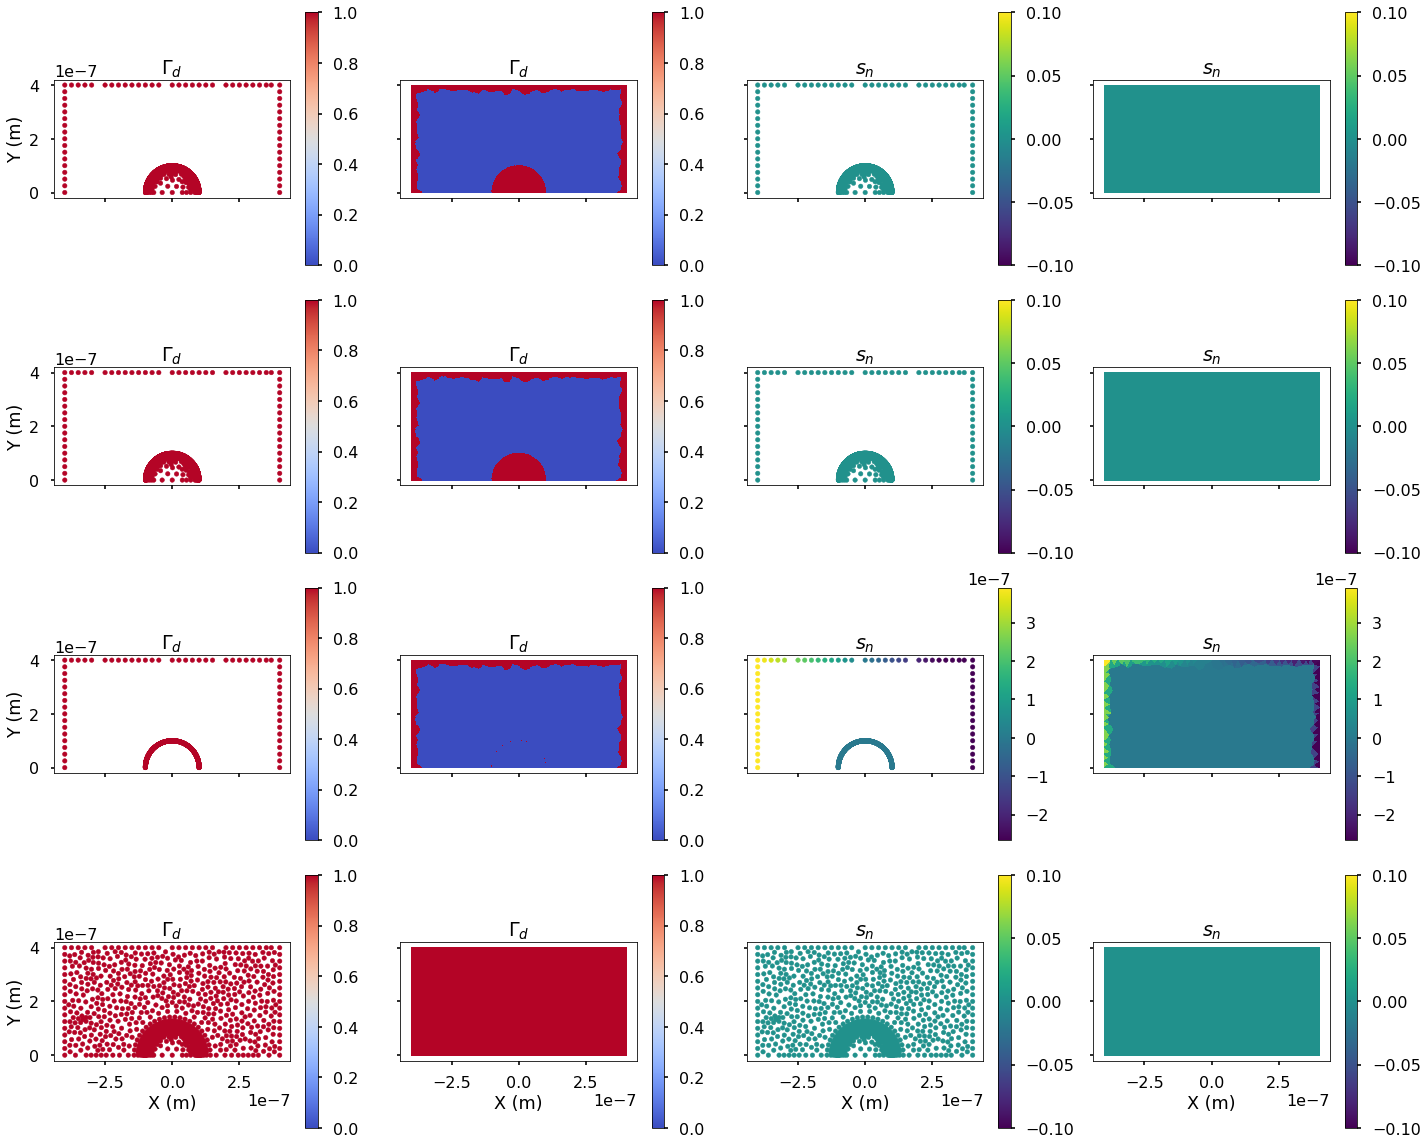

In [156]:
fem.dirichlet.visualize(mesh,pde)

In [158]:
pde.visualize()

c_x['is_in_air']: 
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]
[        0.00E+00        0.00E+00        8.85E-12        0.00E+00]
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]

c_x['is_in_water']: 
[        1.26E-09        0.00E+00       build_c()        0.00E+00]
[        0.00E+00        1.26E-09       build_c()        0.00E+00]
[        0.00E+00        0.00E+00        7.08E-10        0.00E+00]
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]

c_x['is_in_solid']: 
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]
[        0.00E+00        0.00E+00        3.98E-11        0.00E+00]
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]

c_x['is_with_stern']: 
[        0.00E+00        0.00E+00        0.00E+00        0.00E+00]
[        0.00E+00        0.00E+00        0

## Validate solution

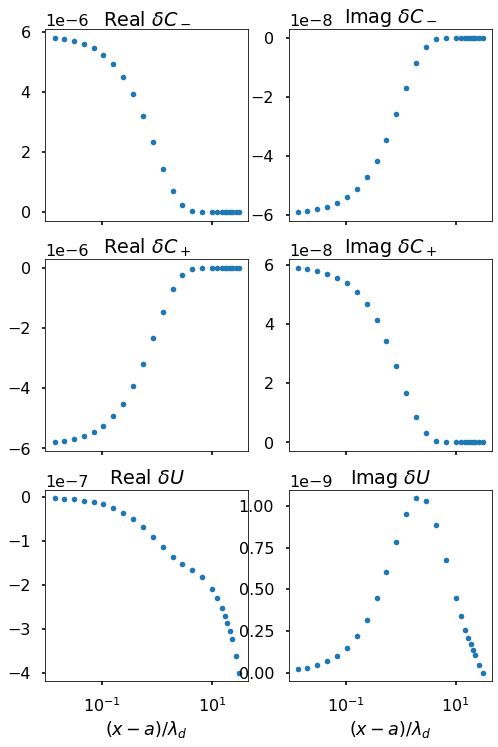

Done


In [48]:
def display_results_real_imag():
    a=0.1e-6
    nodes=mesh.nodes
    elements=mesh.elements
    debye_len = min(physics.lambda_d)
    unod = np.reshape(fem.sol,(len(mesh.nodes),-1))
    
#     #debye_len=np.sqrt(perm0*rel_perm_electrolyte*kB*temp_K/2/zval**2/echarge**2/kA/cinf)
#     debye_len=np.sqrt(perm0*80*kB*293/2/1**2/echarge**2/kA/1)
#     print('DEBYE LENGTH IS: %.2e nm'%(debye_len*1e9))
    
    mask=(nodes[:,1]==0)&(nodes[:,0]>a)
    fig,ax=plt.subplots(3,2,sharex=True,figsize=(8,4*3))
    axs=ax.flatten()
    titles=['$\delta C_-$','$\delta C_+$','$\delta U$']
    for i in range(3):
        x=(nodes[mask,0]-a)/debye_len
        y=unod[mask,i]
        axs[2*i].plot(x,np.real(y),'.')
        axs[2*i].set_title('Real '+titles[i])
        axs[2*i].set_xscale('log')
        
        axs[2*i+1].plot(x,np.imag(y),'.')
        axs[2*i+1].set_title('Imag '+titles[i])
        axs[2*i+1].set_xscale('log')
    
    axs[4].set_xlabel('$(x-a)/\lambda_d$')
    axs[5].set_xlabel('$(x-a)/\lambda_d$')
    plt.show()
    
    return fig,ax

def display_contour_real_imag():
    a=0.1e-6
    nodes=mesh['nodes']
    elements=mesh['elements']
    
    x=np.r_[nodes[:,0],nodes[:,0]]
    y=np.r_[-nodes[:,1],nodes[:,1]]
    z=np.r_[unod[:,2],unod[:,2]]
    
#     in_zones=mesh['in_zones']
#     nind=np.unique(elements[in_zones,:].flatten())
#     mask=np.ones(len(nodes),dtype=bool)
#     mask[nind]=0
#     print(unod[mask,:])

    vmin=[-2.5e-6,-2.5e-6,-0.2e-6]
    vmax=[2.5e-6,2.5e-6,0.2e-6]
    x=nodes[:,0]
    y=nodes[:,1]
    mids2d=compute_mids2d_elem(nodes,elements,dist_factor=1.0)
    mask=mesh['in_zones']
    mask[:]=True

    fig,ax=plt.subplots(3,2,sharex=True,figsize=(8,12),dpi=160)
    axs=ax.flatten()
    for i in range(3):
        u2d=grad2d_elem(nodes,elements,unod[:,i],dist_factor=1.0)[:,0]
        #contourf=ax.tricontourf(x,y,np.real(z),levels=np.linspace(vmin,vmax,101))
        #fig.colorbar(contourf,ax=ax,location='right',ticks=np.linspace(vmin,vmax,11))
        #p=ax.tripcolor(x,y,np.real(z),vmin=vmin,vmax=vmax)
        tpc=axs[2*i].tripcolor(x,y,elements[mask,:],facecolors=np.real(u2d[mask]),
                         edgecolor='none',vmin=vmin[i],vmax=vmax[i],cmap='YlGnBu_r')
        tpc=axs[2*i].tripcolor(x,-y,elements[mask,:],facecolors=np.real(u2d[mask]),
                         edgecolor='none',vmin=vmin[i],vmax=vmax[i],cmap='YlGnBu_r')
        fig.colorbar(tpc,ax=axs[2*i],location='right')
        axs[2*i].set_aspect(1)
        axs[2*i].set_xlim(-2*a,2*a)
        axs[2*i].set_ylim(-2*a,2*a)
        
        tpc=axs[2*i+1].tripcolor(x,y,elements[mask,:],facecolors=np.imag(u2d[mask]),
                         edgecolor='none',vmin=vmin[i]*1e-2,vmax=vmax[i]*1e-2,cmap='YlGnBu_r')
        tpc=axs[2*i+1].tripcolor(x,-y,elements[mask,:],facecolors=np.imag(u2d[mask]),
                         edgecolor='none',vmin=vmin[i]*1e-2,vmax=vmax[i]*1e-2,cmap='YlGnBu_r')
        fig.colorbar(tpc,ax=axs[2*i+1],location='right')
        axs[2*i+1].set_aspect(1)
        axs[2*i+1].set_xlim(-2*a,2*a)
        axs[2*i+1].set_ylim(-2*a,2*a)
        
    plt.show()

    return fig,ax

if __name__=='__main__':
    _,_=display_results_real_imag()
#     _,_=display_contour_real_imag()
    print('Done')


# Example 05

## Run simulation

Reading mesh_ex05_1.1.node
Reading mesh_ex05_1.1.ele
Reading mesh_ex05_1.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  17.423104763031006 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  8.624444484710693 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  86.7524516582489 sec

Assembling the system of equations for line segments
Time elapsed  20.68530511856079 sec

Incoorprating the boundary condition of the third kind
Time elapsed  17.4736168384552 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  3.174520492553711 sec

Calling sparse linear system solver
Time elapsed  2.0116004943847656 sec

Computing fields and gradients in elements
Time elapsed  0.08426856994628906 sec



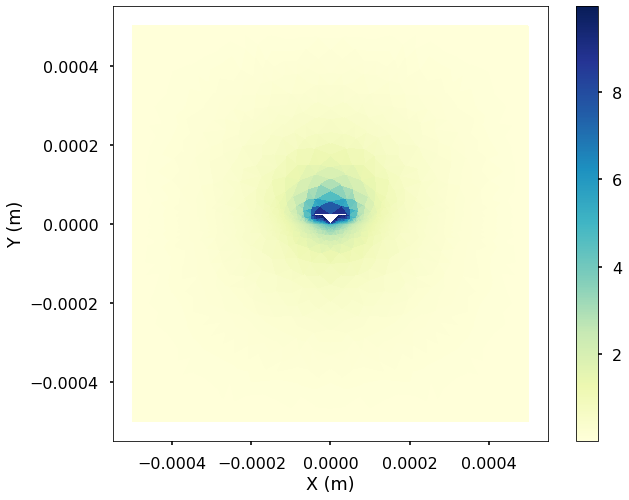

In [18]:
# Equipotential solution for Full cantilever model
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Flags,Mesh
from lib.materials import Consts,PDE
from lib.assembly import FEM

#import mesh
mesh = Mesh.importer(
    prefix = 'mesh_ex05_1', #10-nm water
    axis_symmetry = 'Y',
    unscale_factor = 1e-6,
    )

#define PDE
pde = PDE(
    c_x = {'is_in_air':[[Consts.p]],
           'is_in_water':[[Consts.p*80.0]],
           'is_in_solid':[[Consts.p*4.5]]},
    c_y = {'is_in_air':[[Consts.p]],
           'is_in_water':[[Consts.p*80.0]],
           'is_in_solid':[[Consts.p*4.5]]},
    s_n = {'is_on_inner_bound':[10.0],
           'is_on_outer_bound':[0.0],
           'is_on_outside_domain':[0.0]},
    )

#build FEM system
fem = FEM(mesh,pde)

#display results
mesh.tripcolor(fem.sol)

Computing fields and gradients in elements
Time elapsed  0.08414554595947266 sec



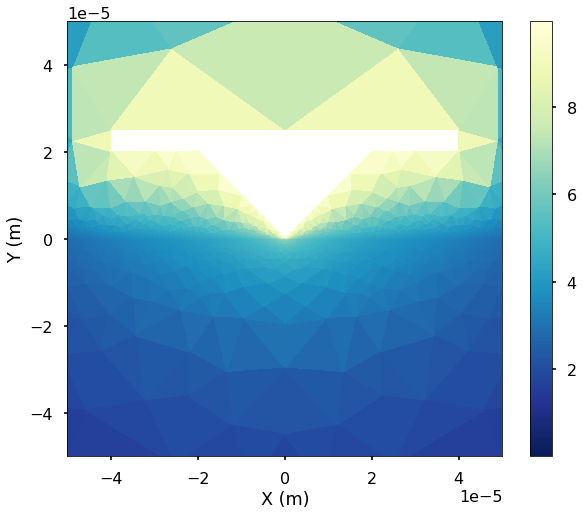

In [22]:
mesh.tripcolor(fem.sol,vmin=1e-6,vmax=[],logscale=False,
               xlim=[-50e-6,50e-6],ylim=[-50e-6,50e-6],cmap='YlGnBu_r')

(-5e-05, 5e-05)

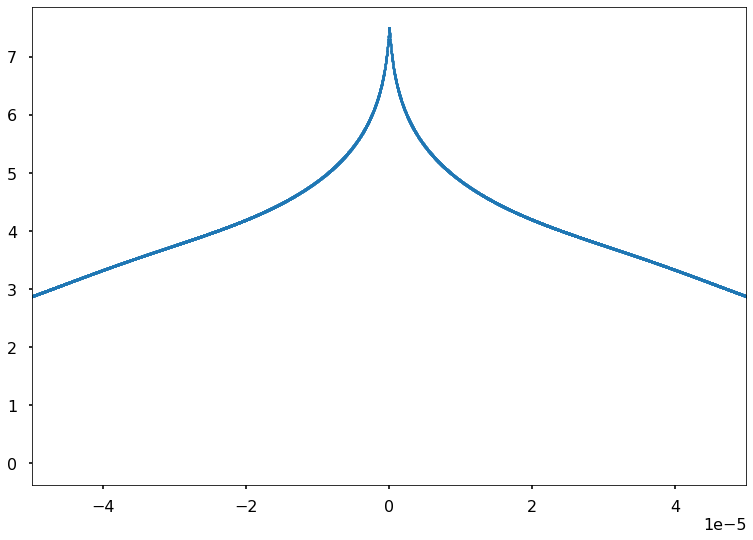

In [42]:
fig,ax=plt.subplots()
mask = mesh.is_on_stern
ax.plot(mesh.nodes[mask,0],fem.sol[mask],'.',color='tab:blue',markersize=5)
ax.plot(-mesh.nodes[mask,0],fem.sol[mask],'.',color='tab:blue',markersize=5)
ax.set_xlim([-50e-6,50e-6])

In [ ]:
#build an interpolator of the Dirichlet boundary condition

## Validate solution

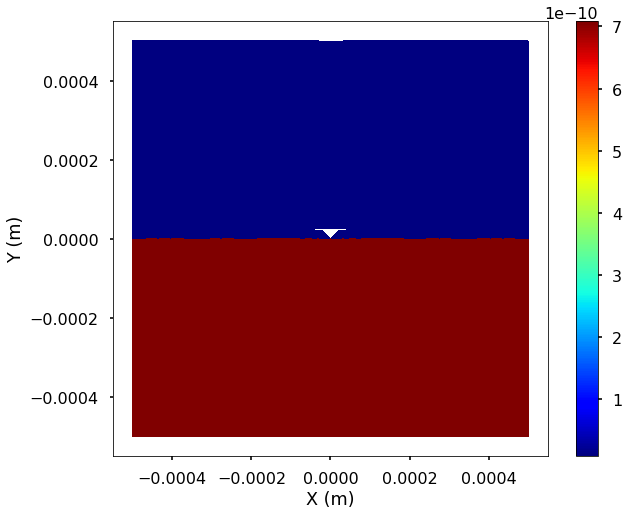

In [43]:
mesh.tripcolor(fem.domain.c_y[:,0,0]/mesh.elem_mids[:,0],cmap='jet')
# mesh.tripcolor(fem.dirichlet.s_n[:,0],xlim=[-50e-6,50e-6],ylim=[-10e-6,60e-6])
# mesh.scatter(fem.dirichlet.s_n[:,0],xlim=[-50e-9,50e-9],ylim=[-10e-9,60e-9])

THE NUMBER OF NODES IS:  11621
THE NUMBER OF ELEMENTS IS:  23049
THE NUMBER OF EDGES IS:  34652

node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



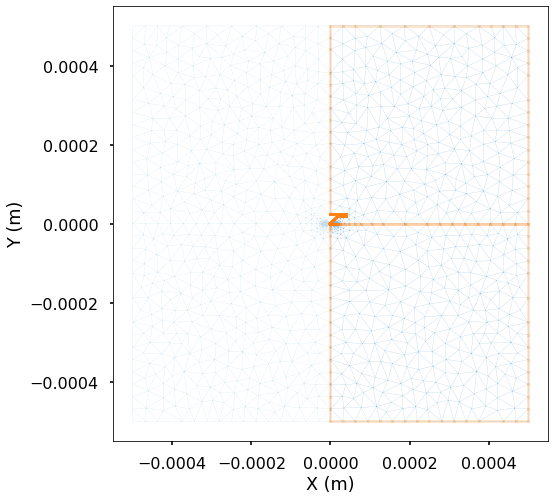


THE NUMBER OF NODES IS:  11621
THE NUMBER OF ELEMENTS IS:  23049
THE NUMBER OF EDGES IS:  34652

node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



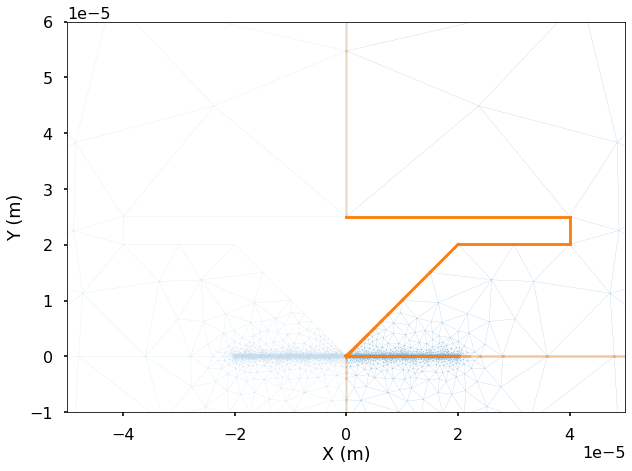

In [44]:
mesh.visualize(edge_flags=[3])
print('')
mesh.visualize(edge_flags=[3],xlim=[-50e-6,50e-6],ylim=[-10e-6,60e-6])

## Run simulation (5 nm water)

# Example 06

## Run simulation

Reading mesh_ex06.1.node
Reading mesh_ex06.1.ele
Reading mesh_ex06.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  2.047067880630493 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.9653551578521729 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  51.077118158340454 sec

Assembling the system of equations for line segments
Time elapsed  3.32659912109375 sec

Incoorprating the boundary condition of the third kind
Time elapsed  2.7673568725585938 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  2.038119316101074 sec

Calling sparse linear system solver
Time elapsed  0.7426130771636963 sec

Computing fields and gradients in elements
Time elapsed  0.00914764404296875 sec



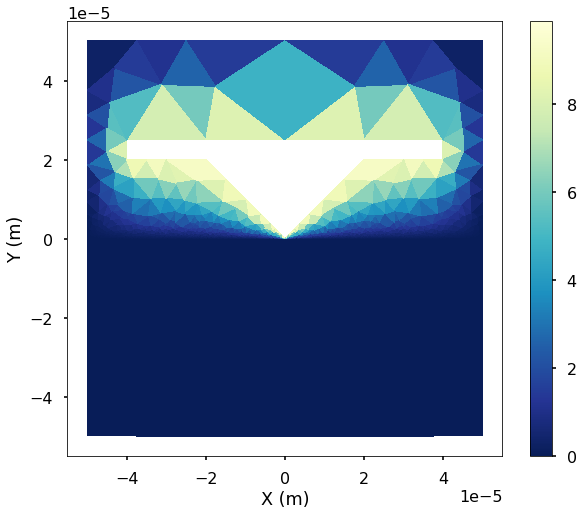

Computing fields and gradients in elements
Time elapsed  0.009422779083251953 sec



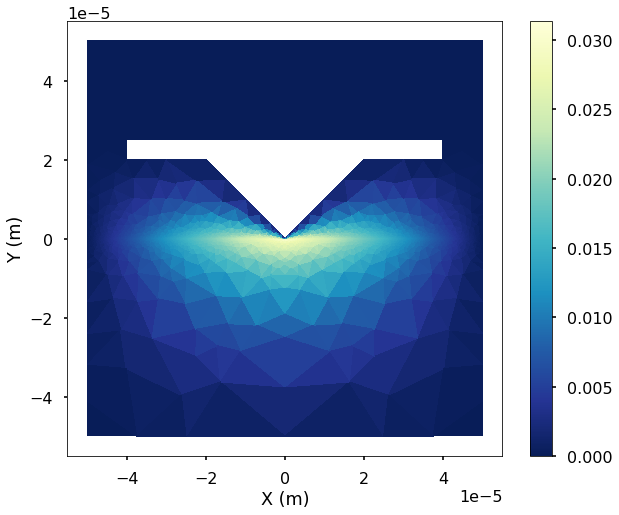

In [15]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh
from lib.materials import PerturbPDE,Physics
from lib.assembly import PerturbFEM

#import mesh
mesh = Mesh.importer(
    prefix = 'mesh_ex06',
    axis_symmetry = 'Y',
    unscale_factor=1e-6,
    )

#define physical parameters
physics = Physics(
    c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
    z_ion = [-1.0,1.0], #ion valence or charge number [SI]
    mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
    mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
    rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
    rel_perm_i = 4.5, #relative permittivity of solid [SI]
    sigma_solid = -0.01, #surface charge density for solid [C]
    temperature = 293.0, #ambient temperature [K]
    e_0 = [0.0,0.0], #Ex/Ey at infinity
    f_0 = [[0.0,0.0,0.0]], #x/y/charge density at point sources
    s_0 = 10.0, #voltage on equipotential surface
    radius_a = 0.0, #radius of sphere particle
    is_solid_metal = False, #True if solid is metal otherwise false
    )

#build PDE using pre-defined physics
pde = PerturbPDE(physics)

#build FEM system
fem = PerturbFEM(mesh,pde)

#display results
mesh.tripcolor(np.real(fem.sol[:,-2]),cmap='YlGnBu_r')
mesh.tripcolor(np.imag(fem.sol[:,-2]),cmap='YlGnBu_r')


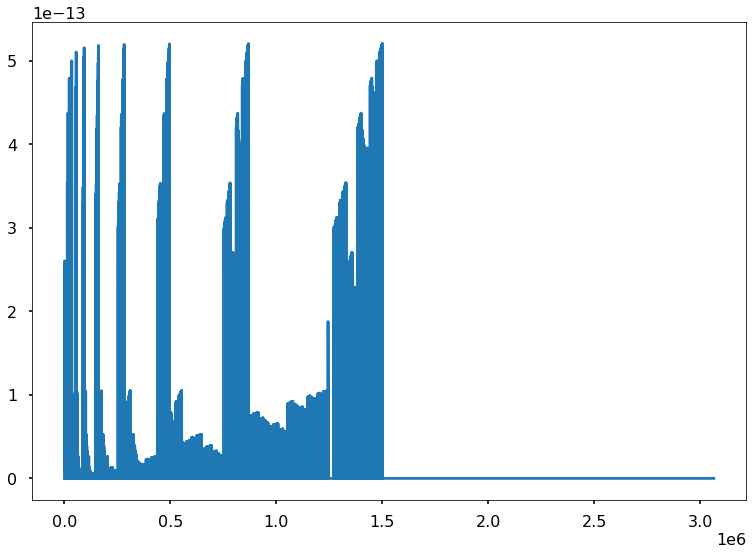

In [10]:
fig,ax=plt.subplots()
# ax.plot(fem.stern.K1.data)
ax.plot(fem.stern.K2.data)
# ax.plot(fem.domain.K1.data)

## Validate solution

THE NUMBER OF NODES IS:  27413
THE NUMBER OF ELEMENTS IS:  54664
THE NUMBER OF EDGES IS:  82058

node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



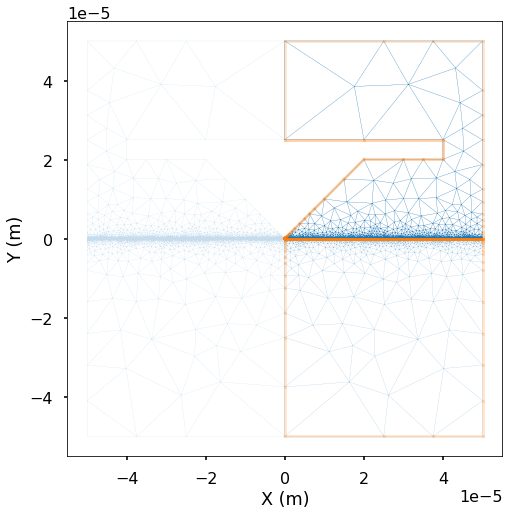

In [54]:
mesh.visualize(elem_flags=[3])

THE NUMBER OF NODES IS:  27413
THE NUMBER OF ELEMENTS IS:  54664
THE NUMBER OF EDGES IS:  82058

node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



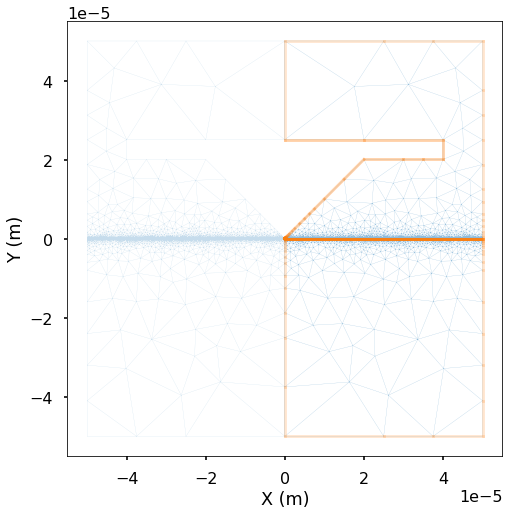

In [55]:
mesh.visualize()

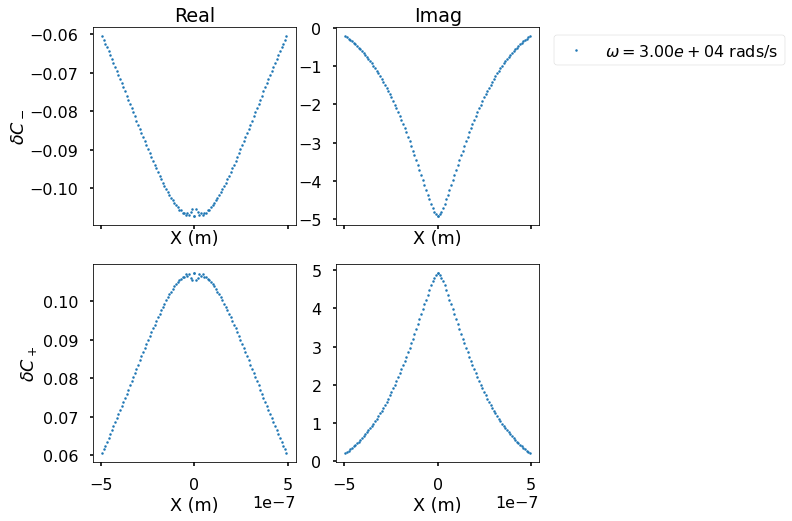

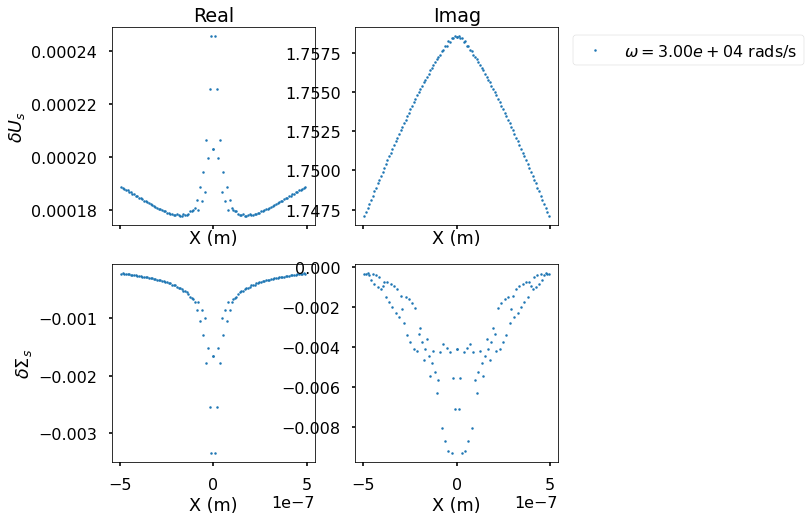

Done


In [16]:
def display_results_real_imag():
    fig,ax=plt.subplots(2,2,figsize=(8,8),sharex=True)
    axs=ax.flatten()
    freqs=[3e4]
    max_len = 5e-7
    
    nodes=mesh.nodes
    n_node = len(mesh.nodes)
    mask=(nodes[:,1]==0)&(np.abs(nodes[:,0])<max_len)
    labels=[]
    for i in range(len(freqs)):
        #unod=np.load(savedir+'/freq_%.2e.npy'%freq[i])
        unod = np.reshape(fem.sol,(n_node,-1))
        xp=np.r_[-nodes[mask,0],nodes[mask,0]]
        yp=np.r_[unod[mask,0],unod[mask,0]]
        axs[0].plot(xp,np.real(yp),'.',markersize=5)
        axs[1].plot(xp,np.imag(yp)*180/np.pi,'.',markersize=5)
        
        xp=np.r_[-nodes[mask,0],nodes[mask,0]]
        yp=np.r_[unod[mask,1],unod[mask,1]]
        axs[2].plot(xp,np.real(yp),'.',markersize=5)
        axs[3].plot(xp,np.imag(yp)*180/np.pi,'.',markersize=5)

        labels.append('$\omega=%.2e$ rads/s'%(freqs[i]))
        #axs[0].set_yscale('Log')
        #axs[2].set_yscale('Log')

    axs[0].set_title('Real')
    axs[1].set_title('Imag')
    
    axs[0].set_ylabel('$\delta C_-$')
    axs[2].set_ylabel('$\delta C_+$')

    axs[0].set_xlabel('X (m)')
    axs[1].set_xlabel('X (m)')    
    axs[2].set_xlabel('X (m)')
    axs[3].set_xlabel('X (m)')
    axs[1].legend(labels,loc='upper right',bbox_to_anchor=(2.250,1.0))
    
    
    fig,ax=plt.subplots(2,2,figsize=(8,8),sharex=True)
    axs=ax.flatten()
    for i in range(len(freqs)):
        #unod=np.load(savedir+'/freq_%.2e.npy'%freq[i])
        unod = np.reshape(fem.sol,(n_node,-1))
        xp=np.r_[-nodes[mask,0],nodes[mask,0]]
        yp=np.r_[unod[mask,2],unod[mask,2]]
        axs[0].plot(xp,np.real(yp),'.',markersize=5)
        axs[1].plot(xp,np.imag(yp)*180/np.pi,'.',markersize=5)
        
        xp=np.r_[-nodes[mask,0],nodes[mask,0]]
        yp=np.r_[unod[mask,3],unod[mask,3]]
        axs[2].plot(xp,np.real(yp),'.',markersize=5)
        axs[3].plot(xp,np.imag(yp)*180/np.pi,'.',markersize=5)

        labels.append('$\omega=%.2e$ rads/s'%(freqs[i]))
        #axs[0].set_yscale('Log')
        #axs[2].set_yscale('Log')

    axs[0].set_title('Real')
    axs[1].set_title('Imag')
    
    axs[0].set_ylabel('$\delta U_s$')
    axs[2].set_ylabel('$\delta \Sigma_s$')

    axs[0].set_xlabel('X (m)')
    axs[1].set_xlabel('X (m)')    
    axs[2].set_xlabel('X (m)')
    axs[3].set_xlabel('X (m)')
    axs[1].legend(labels,loc='upper right',bbox_to_anchor=(2.250,1.0))

    plt.savefig('slab_1.png',bbox_inches='tight')
    plt.show()
    return fig,ax

if __name__=='__main__':
    #_,_=display_results_x0_y0()
    _,_=display_results_real_imag()
    #_,_=display_results_amp_phase()
    print('Done')

# Pseudo-code

In [ ]:
# slab = Complex.init_slab(
#     radius_air = 1.0, #radius of air
#     height_air = 1.0, #height of air
#     radius_water = 1.0, #radius of water
#     height_water = 0.2, #height of water
#     radius_solid = 1.0, #radius of solid
#     height_solid = 1.0, #height of solid
#     axis_symmetry = 'None', #X, or Y, or None
#     )
# slab.visualize()

# mesh = Mesh.builder(
#     prefix = 'slab_test',
#     triangle = 'triangle',
#     cpts = slab.cpts,
#     segs = slab.segs,
#     holes = slab.holes,
#     zones = slab.zones,
#     axis_symmetry = slab.axis_symmetry
#     )
# mesh.visualize()

# phys = Physics(
#     c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
#     z_ion = [-1.0,1.0], #ion valence or charge number [SI]
#     mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
#     mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
#     rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
#     rel_perm_i = 4.5, #relative permittivity of solid [SI]
#     sigma_solid = -0.01, #surface charge density for solid [C]
#     temperature = 293.0, #ambient temperature [K]
#     e_0 = [0.0,0.0], #Ex/Ey at infinity
#     f_0 = [[0.0,0.0,0.0]], #x/y/charge density at point sources
#     s_0 = 0.0, #voltage on equipotential surface
#     is_solid_metal = False, #True if solid is metal otherwise false
#     )

# #Overide mesh by import another mesh
# mesh = Mesh.importer(
#     prefix = 'slab_2d',
#     triangle = 'triangle',
#     axis_symmetry = slab.axis_symmetry,
#     )

# mesh.visualize(
#     edge_flags=[1,2,3,11,12,14],
#     elem_flags=[2,3]
#     )

# def build_f(x,y,*args):
#     dist = np.sqrt(x**2+y**2)
#     f = np.zeros_like(dist)
#     mask = dist>0
#     f[mask] = np.pi/2.0*(1/dist[mask]*np.sin(np.pi*dist[mask]/2.0)
#                          +np.pi/2.0*np.cos(np.pi*dist[mask]/2.0))
#     f[~mask] = np.pi/2.0*(np.pi/2.0+np.pi/2.0)
#     return f

# def build_s(x,y,*args):
#     dist = np.sqrt(x**2+y**2)
#     s = np.cos(np.pi*dist/2.0)
#     return s

# pde = PDE(
#     c_x = {'is_inside_domain':1.0},
#     c_y = {'is_inside_domain':1.0},
#     f_n = {'is_on_inside_domain':build_f},
#     s_n = {'is_on_outer_bound':build_s},
#     )

# domain = Domain(mesh,pde)
# stern = Stern(mesh,pde)
# robin = Robin(mesh,pde)
# dirichlet = Dirichlet(mesh,pde)

# stat = PDE.init_static(phys)
# # domain = Domain(mesh,stat)
# # stern = Stern(mesh,stat)
# # robin = Robin(mesh,stat)
# # dirichlet = Dirichlet(mesh,stat)
# print('Done')